In [35]:
import glworia.load_interp
from glworia.load_interp import *
import bilby_scripts.waveform
from bilby_scripts.waveform import *
import bilby

In [36]:
import configparser
import matplotlib.pyplot as plt

In [37]:
from importlib import reload

In [38]:
reload(glworia.load_interp)
from glworia.load_interp import *
reload(bilby_scripts.waveform)
from bilby_scripts.waveform import *

In [85]:
lp_name = 'kappa'

settings = {
    'lens_param_name': lp_name,
    'y_low': 0.1,
    'y_high': 5.0,
    lp_name + '_low': 0.1,
    lp_name + '_high': 10.,
    'N_grid': 30,
    'N_grid_strong': 60,
    'N_crit': 60,
    'N': 200,
    'lens_model_name': 'NFW',

    'T0_max': 1000,

    'y_low_im': 0.1,
    'y_high_im': 5.0,
    lp_name + '_low_im': 0.1,
    lp_name + '_high_im': 10.,
    'N_grid_im': 1000,
    'N_crit_im': 1000,
}

In [86]:
config = configparser.ConfigParser()
config.optionxform = str
config.read('./bilby_scripts/config/NFW_arr1_fast/MLz_500_y_1.0000_kappa_1.0000.ini')

['./bilby_scripts/config/NFW_arr1_fast/MLz_500_y_1.0000_kappa_1.0000.ini']

In [87]:
injection_parameters = dict(config.items('injection_parameters'))
interpolator_settings = dict(config.items('interpolator_settings'))
prior_settings = dict(config.items('prior_settings'))
waveform_arguments = dict(config.items('waveform_arguments'))
sampler_settings = dict(config.items('sampler_settings'))
misc = dict(config.items('misc'))

def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False
    
for d in [injection_parameters, interpolator_settings, prior_settings, waveform_arguments, sampler_settings, misc]:
    for key, value in d.items():
        if is_number(value):
            d[key] = eval(value)
        elif value == 'True':
            d[key] = True
        elif value == 'False':
            d[key] = False


In [88]:
duration = misc['duration']
sampling_frequency = misc['sampling_frequency']
minimum_frequency = misc['minimum_frequency']

In [89]:
waveform_generator = bilby.gw.WaveformGenerator(
    duration=duration,
    sampling_frequency=sampling_frequency,
    frequency_domain_source_model=lal_binary_black_hole_lensed,
    parameter_conversion=bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters,
    waveform_arguments=waveform_arguments,
)

waveform_generator_ul = waveform_generator = bilby.gw.WaveformGenerator(
    duration=duration,
    sampling_frequency=sampling_frequency,
    frequency_domain_source_model=lal_binary_black_hole_unlensed,
    parameter_conversion=bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters,
    waveform_arguments=waveform_arguments,
)

02:09 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby_scripts.waveform.lal_binary_black_hole_lensed
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
02:09 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby_scripts.waveform.lal_binary_black_hole_unlensed
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


In [90]:
interpolators = load_interpolators('./interpolation', **settings)
F_interp_loaded = lambda w, y, kappa: F_interp(w, y, kappa, interpolators, interpolator_settings)

# Fixed arguments passed into the source model
waveform_arguments.update(F_interp = F_interp_loaded)

In [91]:
injection_parameters.keys()

dict_keys(['mass_1', 'mass_2', 'a_1', 'a_2', 'tilt_1', 'tilt_2', 'phi_12', 'phi_jl', 'luminosity_distance', 'theta_jn', 'psi', 'phase', 'MLz', 'geocent_time', 'ra', 'dec', 'y', 'kappa'])

In [92]:
injection_parameters['y'] = 0.1
injection_parameters['MLz'] = 2000

In [93]:
wf = waveform_generator.frequency_domain_strain(injection_parameters)
wf_ul = waveform_generator_ul.frequency_domain_strain(injection_parameters)

In [94]:
waveform_generator.frequency_array

array([0.00000e+00, 2.50000e-01, 5.00000e-01, ..., 1.02350e+03,
       1.02375e+03, 1.02400e+03])

(10, 2000)

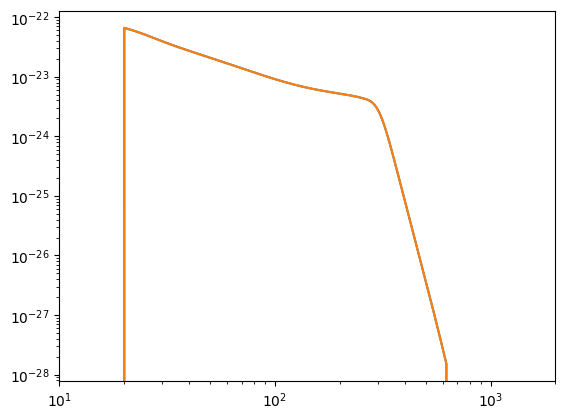

In [95]:
plt.loglog(waveform_generator.frequency_array, np.abs(wf['plus']))
plt.loglog(waveform_generator_ul.frequency_array, np.abs(wf_ul['plus']))
plt.xlim(10, 2000)

In [ ]:
lal_binary_black_hole_lensed()

In [5]:
def strong_lens_cond_override_gSIS(strongly_lensed, y_interp, kappa_interp):
    if np.abs(kappa_interp - 1.) < 1e-15:
        if y_interp < 1.:
            strongly_lensed = True
        else:
            strongly_lensed = False
    return strongly_lensed

In [25]:
w_interp = np.linspace(0.001, 1e4, 10**6)

In [8]:
y_interp = 2.0
lp_interp = 0.1

In [9]:
M_sun = 4.925492321898863e-06
w_fac = 8*np.pi*M_sun

In [10]:
F, F_g, partitions, T_im, mu_im, u0, u1, u2, u3, um = F_interp(w_interp, y_interp, lp_interp, interpolators, settings,
             return_geom = True, 
             strong_lens_cond_override = strong_lens_cond_override_gSIS
             )

/home/mcheung1/Lensing/Glworia_jax/glworia_jax/glworia/load_interp.py:210: RuntimeWarning: divide by zero encountered in divide
  return (1 + np.tanh((x - x0)/a))/2


In [28]:
T_im

[0, 0, 0]

In [29]:
mu_im

[0, 0, array(17.28561422)]

In [30]:
partitions

array([0.       , 0.1851888, 3.703776 ])

In [31]:
F

array([2.93813126-0.0793624j , 3.74092877-0.51766578j,
       4.02464678-0.49210598j, ..., 4.15759717+0.j        ,
       4.15759717+0.j        , 4.15759717+0.j        ])

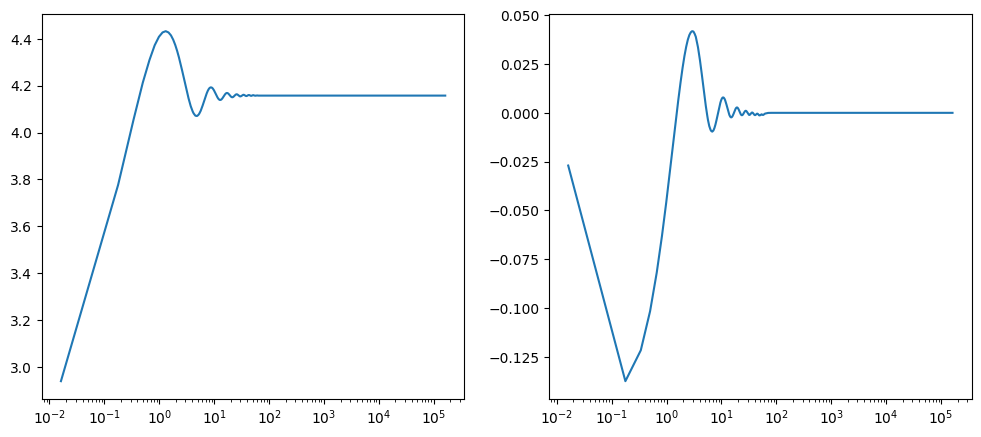

In [36]:
fig, axs = plt.subplots(1, 2, figsize = (12, 5))
axs[0].semilogx(w_interp/w_fac/500, np.abs(F))
# axs[0].semilogx(w_interp, np.abs(F_g), alpha = 0.5)
axs[1].semilogx(w_interp/w_fac/500, np.angle(F))

In [54]:
F_scale = np.max(np.abs(F-1))/2

(0.001, 10.0)

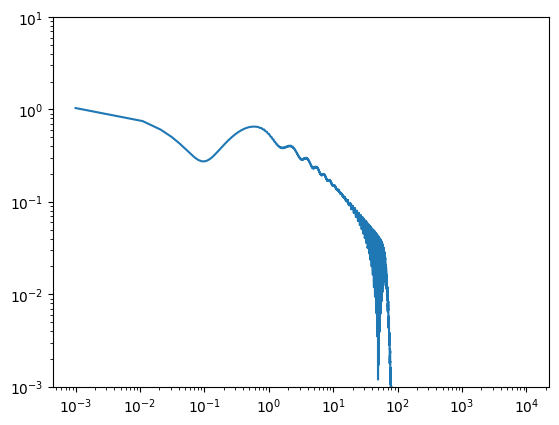

In [55]:
fig, ax = plt.subplots()
ax.loglog(w_interp, np.abs((F-F_g)/F_scale))
ax.set_ylim(1e-3, 1e1)